## Spark Funds Investment Case Study 

### Objective of Case Study 
#### Constraints
Spark funds wants to invest between 5 to 15 million USD per round of investment

Spark funds wants to invest only in English-speaking countries 
#### Strategy
Spark Funds wants to invest where most other investors are investing. 
#### Business objective
The objective is to identify the best sectors, countries, and suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing’.
#### Goals of data analysis:
Investment type analysis: Comparing the typical investment amounts in the venture, seed, angel, private equity etc
Country analysis: Identifying the countries which have been the most heavily invested in the past. 
Sector analysis: Understanding the distribution of investments across the eight main sectors. 

## Checkpoints - Part 1

### Checkpoint 1: Data Cleaning 1

In [1059]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format

# Loading the companies and rounds data into dataframes
companies = pd.read_csv("companies.csv", encoding = "ISO-8859-1")
rounds = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")

In [1060]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,1/1/2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,1/1/2010


In [1061]:
#Checking null value counts
companies.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

Above result shows that , in companies table  homepage_url,category_list,country_code,state_code,region,city,founded_at columns has null values

In [1062]:
companies.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,1/1/2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,1/1/2010


In [1063]:
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00


In [1064]:
#understanding the datatype and non null value counts of rounds table
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [1065]:
#Let's check null value counts in rounds
rounds.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

Above result shows that , in rounds table  funding_round_code and raised_amount_usd  columns has null values

In [1066]:
print(len(companies.permalink.unique()))

66368


In [1067]:
print(len(rounds.company_permalink.unique()))

90247


In [1068]:
print(len(rounds['company_permalink'].str.lower().unique()))

66370


In [1069]:
#created new column as the company_permalink is case sensative 
companies['permalink'] = companies['permalink'].str.lower()

In [1070]:
print(len(companies.permalink.unique()))

66368


In [1071]:
#Creating new column by convering company_permalink to lower case 
rounds['permalink'] = rounds['company_permalink'].str.lower()
# now the unique count should be same without using lower
print(len(rounds.permalink.unique()))

66370


There seems to be 2 extra permalinks in rounds2 table which are not present in the companies table.
 

Lets have look into company permalink which are in the 'rounds2' file but not in the 'companies'

In [1072]:
round_left_join = pd.merge(rounds, companies, how='left', on='permalink', indicator=True)

In [1073]:
round_left_join.head()
left_only = round_left_join[round_left_join['_merge'] != 'both']
left_only

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,nan,/organization/e-cãbica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇµÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,nan,/organization/energystone-games-çµç³æ¸¸æ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,nan,/organization/huizuche-com-æ ç§ÿè½¦,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.00,/organization/magnet-tech-ç£ç³ç§æ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,nan,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,nan,/organization/weiche-tech-åè½¦ç§æ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,nan,/organization/zengame-ç¦ æ¸¸ç§æ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


It is seen from the above table that company_permalink has non English character, lets confirm if the issue is while reading the  excel file using pandas

In [1074]:
rounds_org =  pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
rounds_org.iloc[[101036,109969,113839],:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,nan
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,nan
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,nan


It is seen that the main file rounds2.csv is has data read issue and in excel file there are no special characters, so this looks like data import issue. Lets fix this by addning ascii encoding while reading the file 

In [1075]:
rounds['company_permalink'] = rounds.company_permalink.str.encode('utf-8').str.decode('ascii','ignore')

In [1076]:
rounds.iloc[[101036,109969,113839],:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink
101036,/organization/tipcat-interactive-,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,nan,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...
109969,/ORGANIZATION/WEICHE-TECH-,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,nan,/organization/weiche-tech-åè½¦ç§æ
113839,/ORGANIZATION/ZENGAME-,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,nan,/organization/zengame-ç¦ æ¸¸ç§æ


In [1077]:
rounds['permalink'] = rounds['company_permalink'].str.lower()

In [1078]:
print(len(rounds.permalink.unique()))

66368


##### 1. How many unique companies are present in rounds2?
##### Ans : 66368

In [1079]:
#Lets fix the companies file import issue as well  
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii','ignore')

In [1080]:
print(len(companies.permalink.unique()))

66368


##### 2.How many unique companies are present in the companies file?
#####  Ans : 66368

##### 3 In the companies data frame, which column can be used as the  unique key for each company? Write the name of the column.
##### Ans :permalink

In [1081]:
#lets merge the table to see if any companies in the rounds2 file which are not  present in companies
round_left_join = pd.merge(rounds, companies, how='left', on='permalink', indicator=True)

In [1082]:
round_left_join.head()
left_only = round_left_join[round_left_join['_merge'] != 'both']
len(left_only)

0

#### 4 Are there any companies in the rounds2 file which are not  present in companies ? Answer:  N

#### Both companies and rounds table has 66368 unique permalinks 

#### Merging the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Naming the merged frame master_frame. 

In [1083]:
master_frame = pd.merge(rounds,companies ,how = 'inner' ,on='permalink')

In [1084]:
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.00,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.00,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,4/9/2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.00,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.00,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,1/1/2007


In [1085]:
master_frame.shape

(114949, 16)

#### 5. How many observations are present in master_frame? 
#### Ans : 114949

## Data Cleaning

### Missing value Treatment

In [1086]:
#Checking the null 
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [1087]:
#Lets check the fraction of missing values in the columns
round(100*(master_frame.isnull().sum()/len(master_frame.index)) , 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.00
name                       0.00
homepage_url               5.34
category_list              2.97
status                     0.00
country_code               7.55
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64

As shown above funding_round_code is not useful as it contains 72.91 % null values so dropping it. Aslo dropping the columns which are not useful for the analysis.

In [1088]:
# Dropping unwanted columns 
master_frame = master_frame.drop(['funding_round_code','founded_at','company_permalink','homepage_url','state_code','region','city'],axis=1)


In [1089]:
#Lets check the fraction of missing values in the columns
round(100*(master_frame.isnull().sum()/len(master_frame.index)) , 2)

funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.00
name                       0.00
category_list              2.97
status                     0.00
country_code               7.55
dtype: float64

The columnn raised_amount_usd is important columns which has null values and need to be treated 

In [1090]:
master_frame.raised_amount_usd.describe()

count         94959.00
mean       10426869.33
std       114821247.98
min               0.00
25%          322500.00
50%         1680511.00
75%         7000000.00
max     21271935000.00
Name: raised_amount_usd, dtype: float64

As the mean and median values are not nearby. Also there is huge difference in min and max values.

Lets remove rows having Nans in raised_amount_usd

In [1091]:
#Filtering out the rows having raised_amount_usd as null
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

In [1092]:
master_frame.isnull().sum()

funding_round_permalink       0
funding_round_type            0
funded_at                     0
raised_amount_usd             0
permalink                     0
name                          1
category_list              1044
status                        0
country_code               5851
dtype: int64

In [1093]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)) , 2)

funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
permalink                 0.00
name                      0.00
category_list             1.10
status                    0.00
country_code              6.16
dtype: float64

In [1094]:
# populating the value for null category_list as not known - unknown 
master_frame["category_list"].fillna("unknown", inplace = True) 
# populating the value for null country_code as undefined 
master_frame["country_code"].fillna("undefined", inplace = True) 

In [1095]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)) , 2)

funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
permalink                 0.00
name                      0.00
category_list             0.00
status                    0.00
country_code              0.00
dtype: float64

In [1096]:
master_frame.shape

(94959, 9)

### Checkpoint 2: Funding Type Analysis

In [1097]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False)

funding_round_type
post_ipo_debt           168704571.82
post_ipo_equity          82182493.87
secondary_market         79649630.10
private_equity           73308593.03
undisclosed              19242370.23
debt_financing           17043526.02
venture                  11748949.13
grant                     4300576.34
convertible_note          1453438.54
product_crowdfunding      1363131.07
angel                      958694.47
seed                       719818.00
equity_crowdfunding        538368.21
non_equity_assistance      411203.05
Name: raised_amount_usd, dtype: float64

In [1098]:
#Filtering out funding_round_type other than venture', 'angel', 'seed', 'private_equity
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]

In [1099]:
master_frame['funding_round_type'].value_counts()

venture           50228
seed              23603
angel              4860
private_equity     1936
Name: funding_round_type, dtype: int64

In [1100]:
master_frame['raised_amount_usd'].describe()

count         80627.00
mean        9347994.74
std        75629397.45
min               0.00
25%          400000.00
50%         2000000.00
75%         7975495.50
max     17600000000.00
Name: raised_amount_usd, dtype: float64

#### It is seen that there is huge gap between mean and median . mean is at 9347994.74 and median is 2000000.00. 

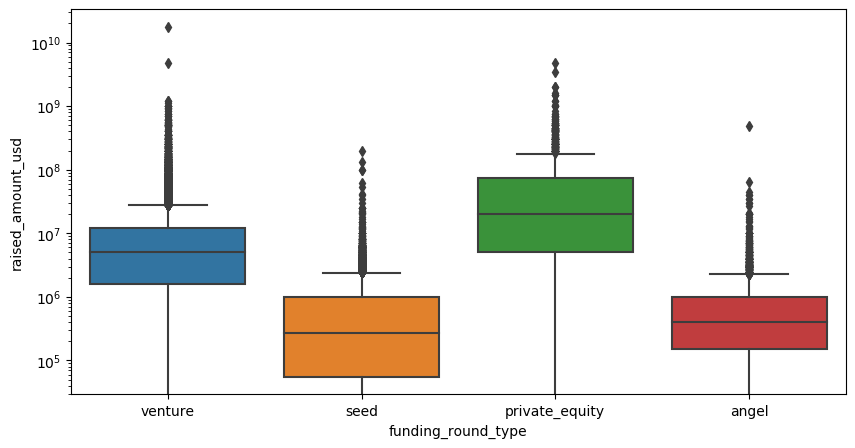

In [1101]:
#box plot to see the distribution of amount raised usd among 4 funding types 
plt.figure(figsize=(10, 5))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

#### To compute the most representative of the funding amount for each type of investment,  we have to either compute the mean or meadian .
#### From the box plot we infere that that there are lot of outliers in the data and at higher amount.

In [1102]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending = False)

funding_round_type
private_equity   73308593.03
venture          11748949.13
angel              958694.47
seed               719818.00
Name: raised_amount_usd, dtype: float64

In [1103]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending = False)

funding_round_type
private_equity   20000000.00
venture           5000000.00
angel              400000.00
seed               275000.00
Name: raised_amount_usd, dtype: float64

As seen, there is huge difference between mean and median values for the funding types . There are extream values which is pulling mean up towards them , so lets choose median as most represntative values. 

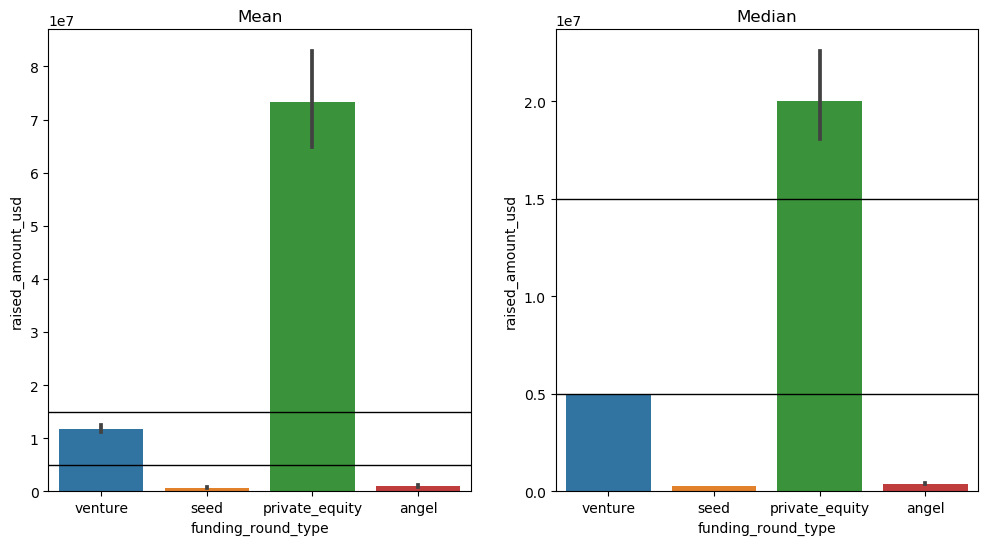

In [1104]:
# ubplots for mean and median respectively

# increase figure size 
plt.figure(figsize=(12, 6))

# subplot 1: statistic=mean
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.axhline(y=5000000, linewidth=1, color = 'k')
plt.axhline(y=15000000, linewidth=1, color = 'k')
plt.title("Mean")

# subplot 2: statistic=median
plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame, estimator=np.median)
plt.axhline(y=5000000, linewidth=1, color = 'k')
plt.axhline(y=15000000, linewidth=1, color = 'k')
plt.title("Median")

plt.show()

#### 1	Average funding amount/Most representative value  of venture type  : 5000000.00

####  2	Average funding amount/Most representative value of angel type : 400000.00

####  3	Average funding amount/Most representative value of seed type : 275000.00

####  4	Average funding amount/Most representative value of private equity type :  20000000.00


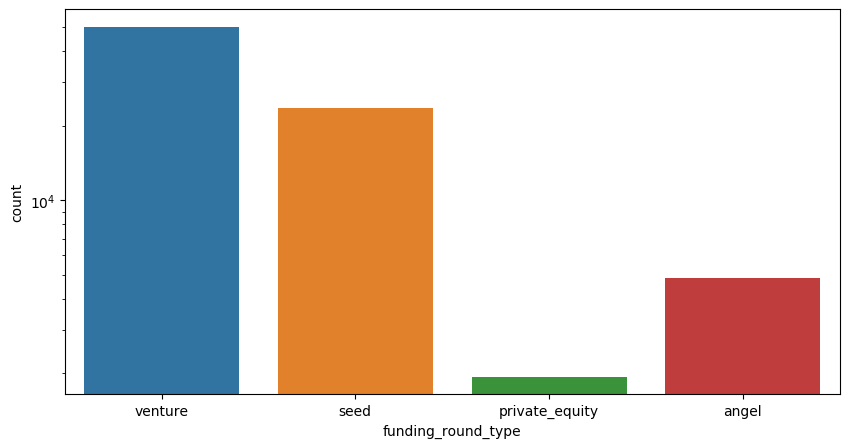

In [1105]:
# Plotting count across a categorical variable (by default its mean )
plt.figure(figsize=(10, 5))
sns.countplot(x="funding_round_type", data=master_frame)
plt.yscale('log')
plt.show()

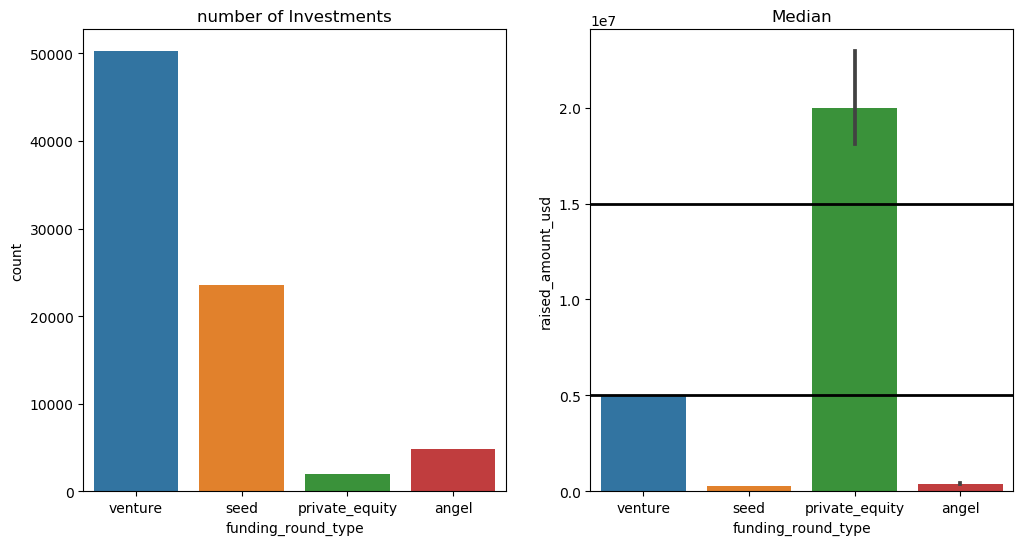

In [1106]:
#Checkpoint 6: Plots
# Plot 1 . A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity,
#    and the average amount of investment in each funding type. 
#    This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=master_frame)
plt.title("number of Investments")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame, estimator=np.median)
plt.title("Median")
plt.axhline(y=5000000, linewidth=2, color = 'k')
plt.axhline(y=15000000, linewidth=2, color = 'k')
plt.show()

### 5 .Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

#### Ans : From above chart it is clearly visible that many are investing in venture and they fall in the bracket of 5 to 15 million which spark fund have budgeted for.

In [1107]:
# Picking rows having funding_round_type  value as venture
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture'])]

## Checkpoints - Part 2

### Checkpoint 3: Country Analysis

In [1108]:
master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

country_code
USA         422510842796.00
CHN          39835418773.00
undefined    25506108414.00
GBR          20245627416.00
IND          14391858718.00
CAN           9583332317.00
FRA           7259536732.00
ISR           6907514579.00
DEU           6346959822.00
JPN           3363676611.00
Name: raised_amount_usd, dtype: float64

#### Creating top9 dataframe with nine countries which have received the highest total funding

In [1109]:
top9 = master_frame[master_frame['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])]

In [1110]:
top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA   422510842796.00
CHN    39835418773.00
GBR    20245627416.00
IND    14391858718.00
CAN     9583332317.00
FRA     7259536732.00
ISR     6907514579.00
DEU     6346959822.00
JPN     3363676611.00
Name: raised_amount_usd, dtype: float64

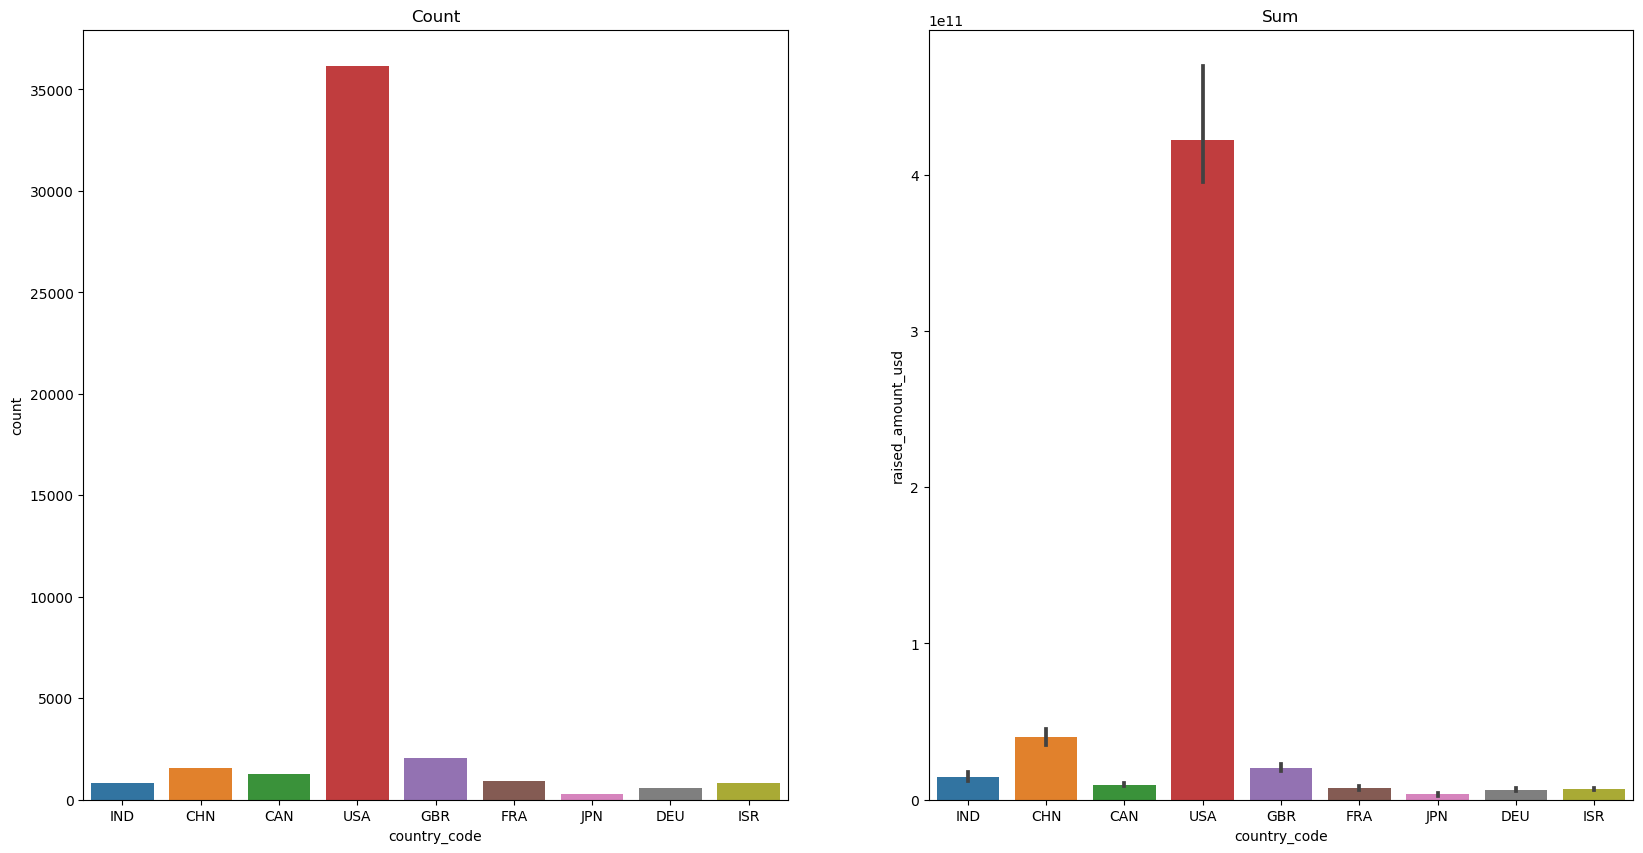

In [1111]:
# Plotting sum  and count across top 9 country_code 

# Checkpoint 6: Plots
# Plot 2 . A plot showing the top 9 countries against the total amount of investments of funding type FT. 
#  This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=top9)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=top9, estimator=sum)
plt.title("Sum")
plt.show()

### Identify the top three English-speaking countries in the data frame top9.
#### 1. USA
#### 2. GBR
#### 3. IND

In [1112]:
# Creating dataframe with top 3 countries for further analysis
top3EnglishSpeaking = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]

In [1113]:
#this is the filtered dataframe with funding type = Venture and top country = USA,GBR,IND
top3EnglishSpeaking.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,/organization/-fame,#fame,Media,operating,IND
10,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,/organization/0xdata,H2O.ai,Analytics,operating,USA
11,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,/organization/0xdata,H2O.ai,Analytics,operating,USA
12,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,/organization/0xdata,H2O.ai,Analytics,operating,USA
22,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA


In [1114]:
top3EnglishSpeaking.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39018 entries, 0 to 114936
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   funding_round_permalink  39018 non-null  object 
 1   funding_round_type       39018 non-null  object 
 2   funded_at                39018 non-null  object 
 3   raised_amount_usd        39018 non-null  float64
 4   permalink                39018 non-null  object 
 5   name                     39018 non-null  object 
 6   category_list            39018 non-null  object 
 7   status                   39018 non-null  object 
 8   country_code             39018 non-null  object 
dtypes: float64(1), object(8)
memory usage: 3.0+ MB


In [1115]:
top3EnglishSpeaking.country_code.value_counts()

USA    36139
GBR     2055
IND      824
Name: country_code, dtype: int64

In [1116]:
top3EnglishSpeaking.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA   422510842796.00
GBR    20245627416.00
IND    14391858718.00
Name: raised_amount_usd, dtype: float64

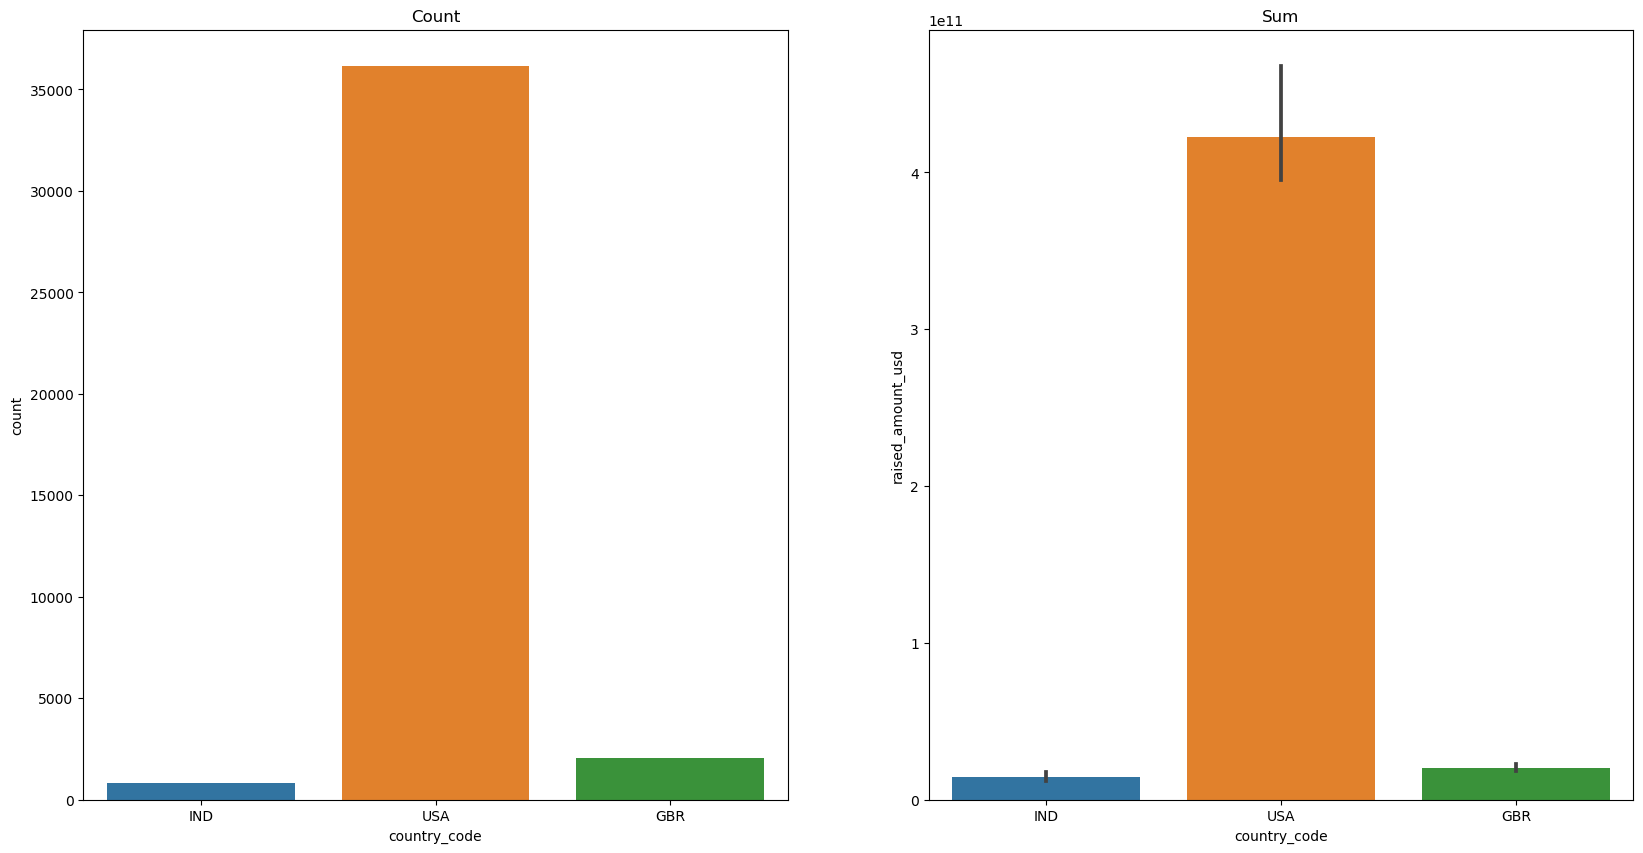

In [1117]:
# Plotting sum and count across top 3  country_code
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=top3EnglishSpeaking)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=top3EnglishSpeaking, estimator=sum)
plt.title("Sum")
plt.show()

### Checkpoint 4: Sector Analysis 1

#### Lets extract the main sector using the column country_list which contains the | deliminated data 

In [1118]:
# This method will derive the primary sector from category_list
def primSector(value):
    values = value.split('|')
    if len(values) > 1:
        return values[0]
    else:
        return value

In [1119]:
import warnings
warnings.filterwarnings('ignore')
top3EnglishSpeaking['primary_sector'] = top3EnglishSpeaking['category_list'].apply(primSector)

In [1120]:
top3EnglishSpeaking['primary_sector'] = top3EnglishSpeaking['primary_sector'].str.lower()

In [1121]:
top3EnglishSpeaking.columns

Index(['funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd', 'permalink', 'name', 'category_list', 'status',
       'country_code', 'primary_sector'],
      dtype='object')

In [1122]:
top3EnglishSpeaking.drop(['category_list'] ,axis = 1)

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,status,country_code,primary_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,/organization/-fame,#fame,operating,IND,media
10,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,/organization/0xdata,H2O.ai,operating,USA,analytics
11,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,/organization/0xdata,H2O.ai,operating,USA,analytics
12,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,/organization/0xdata,H2O.ai,operating,USA,analytics
22,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,/organization/1-mainstream,1 Mainstream,acquired,USA,apps
...,...,...,...,...,...,...,...,...,...
114920,/funding-round/4191cb5258d3863b0212d1083881da64,venture,30-06-2013,12000000.00,/organization/zyomyx-inc,ZYOMYX,operating,USA,biotechnology
114922,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,11-07-2013,14219999.00,/organization/zyomyx-inc,ZYOMYX,operating,USA,biotechnology
114923,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,29-01-2010,555016.00,/organization/zyomyx-inc,ZYOMYX,operating,USA,biotechnology
114934,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.00,/organization/zyrra,Zyrra,operating,USA,e-commerce


In [1123]:
mapping = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")
mapping.head(5)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [1124]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [1125]:
mapping = mapping[~pd.isnull(mapping['category_list'])]

In [1126]:
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [1127]:
mapping['category_list'] = mapping['category_list'].str.lower()

In [1128]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0


In mapping df category_list is represented as identifier and other columns are measured values. It is typical case of 'wide format ' data. We can convert it into long format using pandas melt method 

In [1129]:
mapping = pd.melt(mapping,id_vars=["category_list"])

In [1130]:
mapping.head()

,category_list,variable,value
0,3d,Automotive & Sports,0
1,3d printing,Automotive & Sports,0
2,3d technology,Automotive & Sports,0
3,accounting,Automotive & Sports,0
4,active lifestyle,Automotive & Sports,0


In [1131]:
mapping = mapping[mapping.value != 0]

In [1132]:
mapping.head()

,category_list,variable,value
7,adventure travel,Automotive & Sports,1
13,aerospace,Automotive & Sports,1
44,auto,Automotive & Sports,1
45,automated kiosk,Automotive & Sports,1
46,automotive,Automotive & Sports,1


In [1133]:
mapping = mapping.drop('value', axis=1)
mapping.columns

Index(['category_list', 'variable'], dtype='object')

In [1134]:
mapping.rename(columns={'variable':'main_sector','category_list':'primary_sector'}, inplace=True)

In [1135]:
mapping['primary_sector'] = mapping['primary_sector'].str.lower()
mapping.columns

Index(['primary_sector', 'main_sector'], dtype='object')

In [1136]:
# It is observed that na is misspelled as 0
# replacing na with 0
# e.g 0notechnology :  nanotechnology
import re
mapping['primary_sector'] = mapping.primary_sector.apply(lambda x: re.sub('[0]', 'na', str(x)))

In [1137]:
mapping.head()
top3EnglishSpeaking.columns

Index(['funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd', 'permalink', 'name', 'category_list', 'status',
       'country_code', 'primary_sector'],
      dtype='object')

In [1138]:
#Lets merge the mapping df with top3EnglishSpeaking dataframe
top3EnglishSpeaking = pd.merge(top3EnglishSpeaking, mapping, how='left', on='primary_sector', indicator=True)

In [1139]:
top3EnglishSpeaking._merge.value_counts()

both          38788
left_only       230
right_only        0
Name: _merge, dtype: int64

In [1140]:
left_only = top3EnglishSpeaking[top3EnglishSpeaking['_merge'] != 'both']
left_only.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,_merge
151,/funding-round/895e7a284b35bdf86103e52db8a630a6,venture,03-12-2015,17500000.00,/organization/3pl-central,3PL Central,unknown,operating,USA,unknown,NaN,left_only
214,/funding-round/60daf91c26dd8f3bd8cbb7d9c28ba9b6,venture,02-08-2007,3500000.00,/organization/60frames-entertainment,60Frames Entertainment,unknown,closed,USA,unknown,NaN,left_only
413,/funding-round/215f281607a54b9d5fc848b5c74ef9e7,venture,22-05-2003,15000000.00,/organization/accelerator-corp,Accelerator Corp.,unknown,operating,USA,unknown,NaN,left_only
414,/funding-round/bdca470b4ae21074297ad9da55e11dbf,venture,03-08-2007,22500000.00,/organization/accelerator-corp,Accelerator Corp.,unknown,operating,USA,unknown,NaN,left_only
415,/funding-round/d1341bc6df5065519b7b399ac9a67823,venture,19-11-2004,11800000.00,/organization/accelerator-corp,Accelerator Corp.,unknown,operating,USA,unknown,NaN,left_only


In [1141]:
left_only.primary_sector.sort_values(ascending=True).unique()

array(['adaptive equipment', 'biotechnology and semiconductor',
       'enterprise 2.0', 'greentech', 'natural gas uses',
       'product search', 'racing', 'rapidly expanding', 'retirement',
       'specialty retail', 'unknown'], dtype=object)

In [1142]:
mapping.primary_sector.sort_values(ascending=True)

3435                  3d
3436         3d printing
3437       3d technology
5499          accounting
2752    active lifestyle
              ...       
5491           wholesale
2744    wine and spirits
2745            wireless
5494               women
5495        young adults
Name: primary_sector, Length: 687, dtype: object

In [1143]:
top3EnglishSpeaking.shape

(39018, 12)

In [1144]:
mapping.primary_sector.sort_values(ascending=True)

3435                  3d
3436         3d printing
3437       3d technology
5499          accounting
2752    active lifestyle
              ...       
5491           wholesale
2744    wine and spirits
2745            wireless
5494               women
5495        young adults
Name: primary_sector, Length: 687, dtype: object

In [1145]:
# filtering the records to get the values  where mapping id present 
top3EnglishSpeaking = top3EnglishSpeaking[top3EnglishSpeaking['_merge'] == 'both']
top3EnglishSpeaking = top3EnglishSpeaking.drop('_merge', axis=1)
top3EnglishSpeaking.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,/organization/-fame,#fame,Media,operating,IND,media,Entertainment
1,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
2,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
4,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.00,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps,"News, Search and Messaging"


In [1146]:
len(top3EnglishSpeaking)

38788

### Checkpoint 5: Sector Analysis 2

In [1147]:
# condition for funding type FT falling within the 5-15 million USD range.
top3EnglishSpeaking = top3EnglishSpeaking.drop(top3EnglishSpeaking[(top3EnglishSpeaking.raised_amount_usd < 5000000)].index)
top3EnglishSpeaking = top3EnglishSpeaking.drop(top3EnglishSpeaking[(top3EnglishSpeaking.raised_amount_usd > 15000000)].index)

In [1148]:
# three separate data frames D1, D2 and D3 for each of the three countries containing the
# observations of funding type FT falling within the 5-15 million USD range.
d1 = top3EnglishSpeaking[top3EnglishSpeaking['country_code'] == 'USA']
d2 = top3EnglishSpeaking[top3EnglishSpeaking['country_code'] == 'GBR']
d3 = top3EnglishSpeaking[top3EnglishSpeaking['country_code'] == 'IND']

In [1149]:
d1.shape

(12063, 11)

In [1150]:
d2.shape

(621, 11)

In [1151]:
d3.shape

(328, 11)

In [1152]:
#USA
d1.pivot_table(values='raised_amount_usd', index = ['main_sector'] , aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,167,1454104361.00
Cleantech / Semiconductors,2350,21633430822.00
Entertainment,591,5099197982.00
Health,909,8211859357.00
Manufacturing,799,7258553378.00
"News, Search and Messaging",1583,13971567428.00
Others,2950,26321007002.00
"Social, Finance, Analytics, Advertising",2714,23807376964.00


In [1153]:
d1['raised_amount_usd'].sum()

107757097294.0

In [1154]:
d1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [1155]:
d1[d1['main_sector'] == "Others" ].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

name
Virtustream           64300000.00
Capella Photonics     54968051.00
AirTight Networks     54201907.00
deCarta               52100000.00
Black Duck Software   51000000.00
Name: raised_amount_usd, dtype: float64

In [1156]:
d1[d1['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

name
SST Inc. (Formerly ShotSpotter)   67933006.00
Demandbase                        63000000.00
Intacct                           61800000.00
NetBase Solutions                 60600000.00
Lotame                            59700000.00
Name: raised_amount_usd, dtype: float64

In [1157]:
d2['raised_amount_usd'].count()

621

In [1158]:
d2['raised_amount_usd'].sum()

5379078691.0

In [1159]:
# GBR
d2.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,16,167051565.00
Cleantech / Semiconductors,130,1163990056.00
Entertainment,56,482784687.00
Health,24,214537510.00
Manufacturing,42,361940335.00
"News, Search and Messaging",73,615746235.00
Others,147,1283624289.00
"Social, Finance, Analytics, Advertising",133,1089404014.00


In [1160]:
d2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [1161]:

d2[d2['main_sector'] == "Others" ].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

name
Electric Cloud   37000000.00
SenSage          36250000.00
Enigmatec        32500000.00
Name: raised_amount_usd, dtype: float64

In [1162]:
d2[d2['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

name
Celltick Technologies   37500000.00
myThings                34000000.00
Zopa                    32900000.00
VisualDNA               28550000.00
MarketInvoice           25553007.00
Name: raised_amount_usd, dtype: float64

In [1163]:
d3['raised_amount_usd'].count()

328

In [1164]:

d3['raised_amount_usd'].sum()

2949543602.0

In [1165]:
d3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [1166]:
d3[d3['main_sector'] == "Others" ].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

name
FirstCry.com                                                               39000000.00
Myntra                                                                     38000000.00
CommonFloor                                                                32900000.00
Pepperfry.com                                                              28000000.00
ItzCash Card Ltd.                                                          25000000.00
NxtGen Data Center & Cloud Services                                        22300000.00
Maharana Infrastructure and Professional Services Private Limited (MIPS)   21600000.00
Comat Technologies                                                         21000000.00
CaratLane                                                                  21000000.00
LimeRoad                                                                   20000000.00
Name: raised_amount_usd, dtype: float64

In [1167]:
d3[d3['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

name
Manthan Systems                                  50700000.00
Komli Media                                      28000000.00
ShopClues.com                                    25000000.00
inTarvo                                          21900000.00
Grameen Financial Services                       21556050.00
BankBazaar.com                                   19000000.00
Microland                                        18300000.00
Eka Software Solutions                           16000000.00
Qyuki                                            15400000.00
Financial Information Network & Operations Pvt   15000000.00
Name: raised_amount_usd, dtype: float64

### Checkpoint 6: Plots

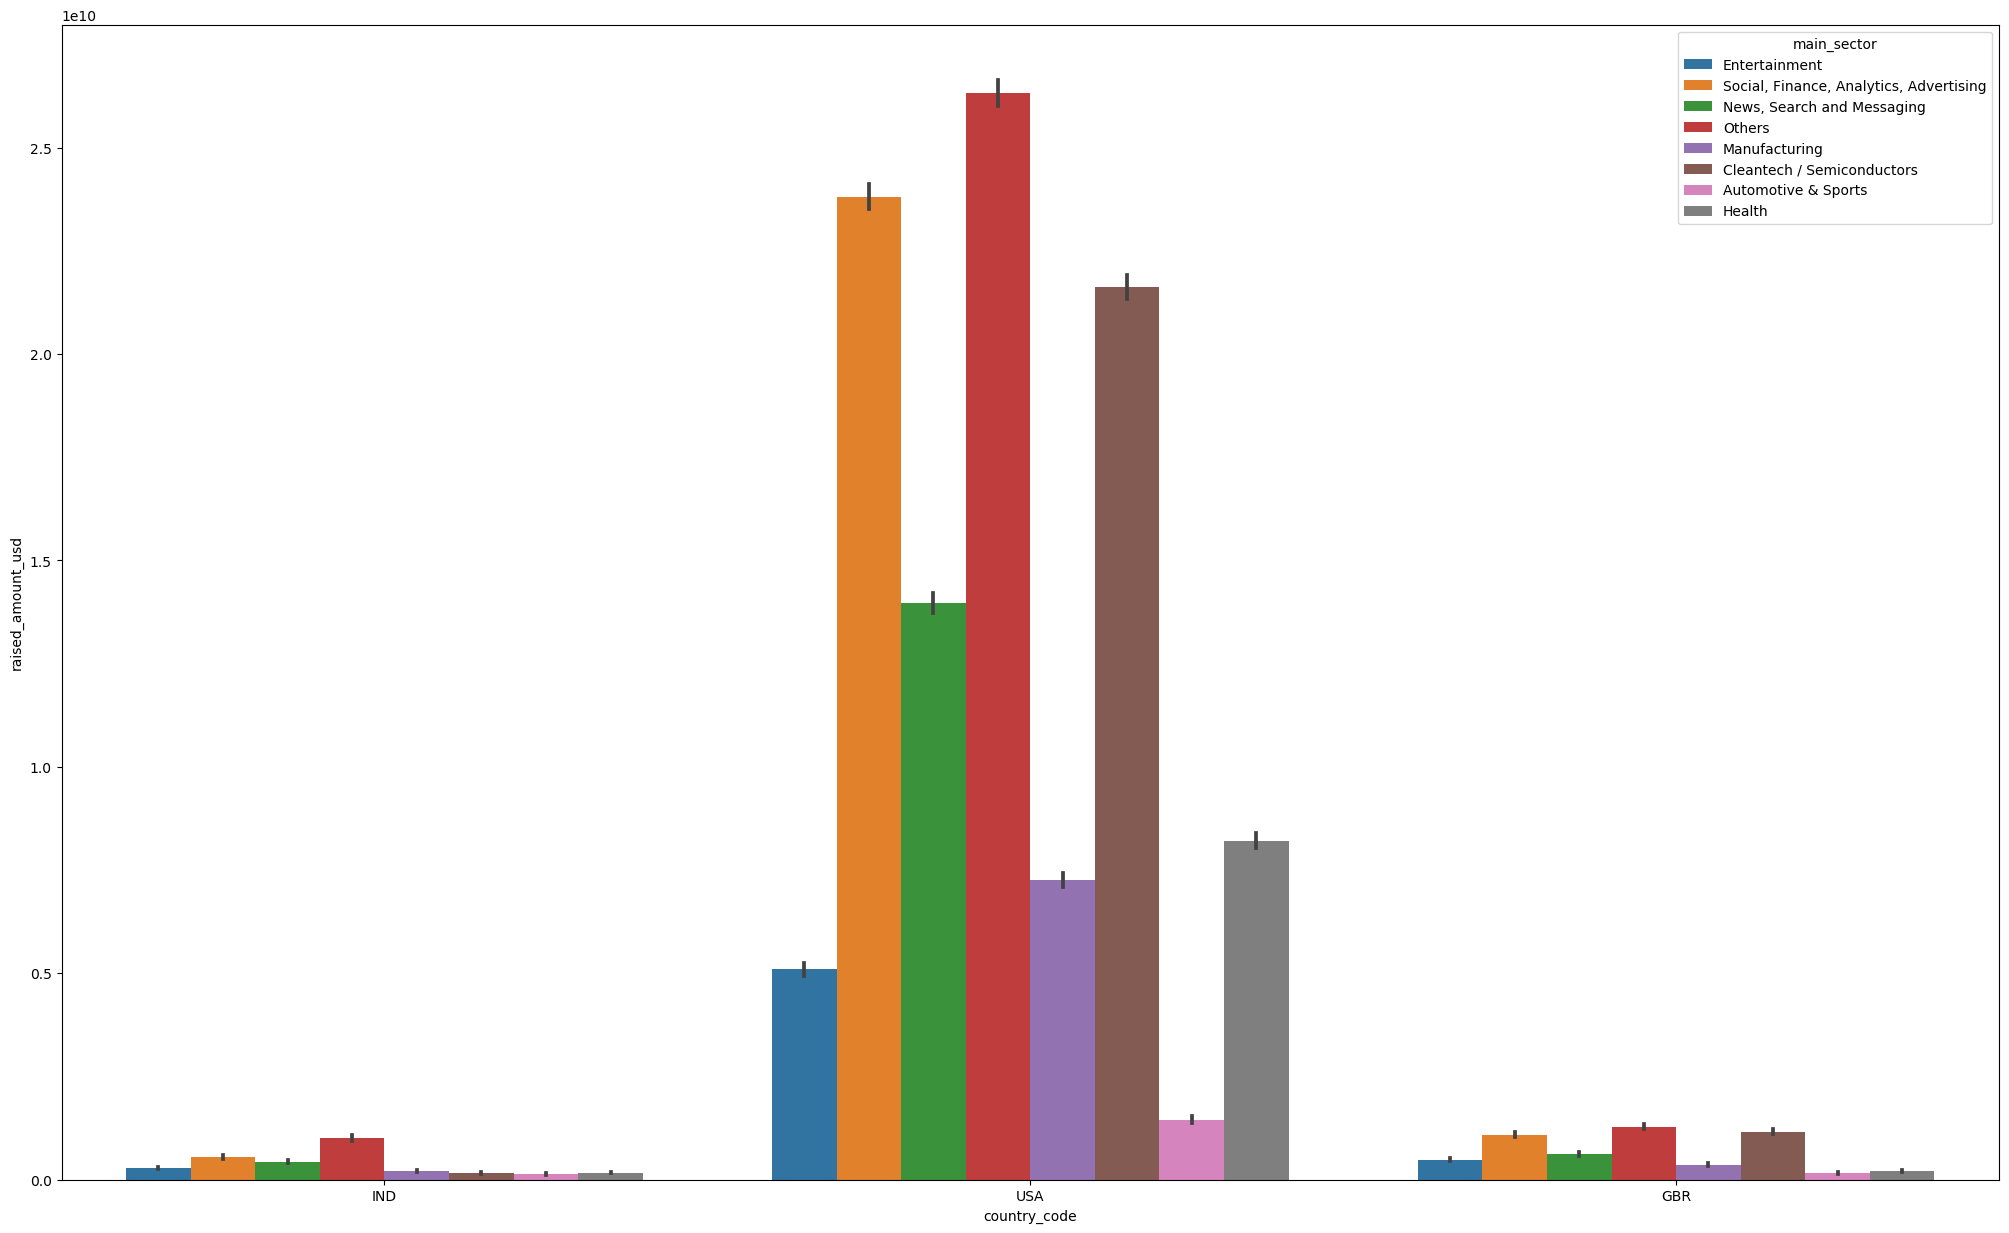

In [1168]:
# specify hue="categorical_variable"
plt.figure(figsize=(25, 15))
sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=top3EnglishSpeaking, estimator=np.sum)
plt.show()

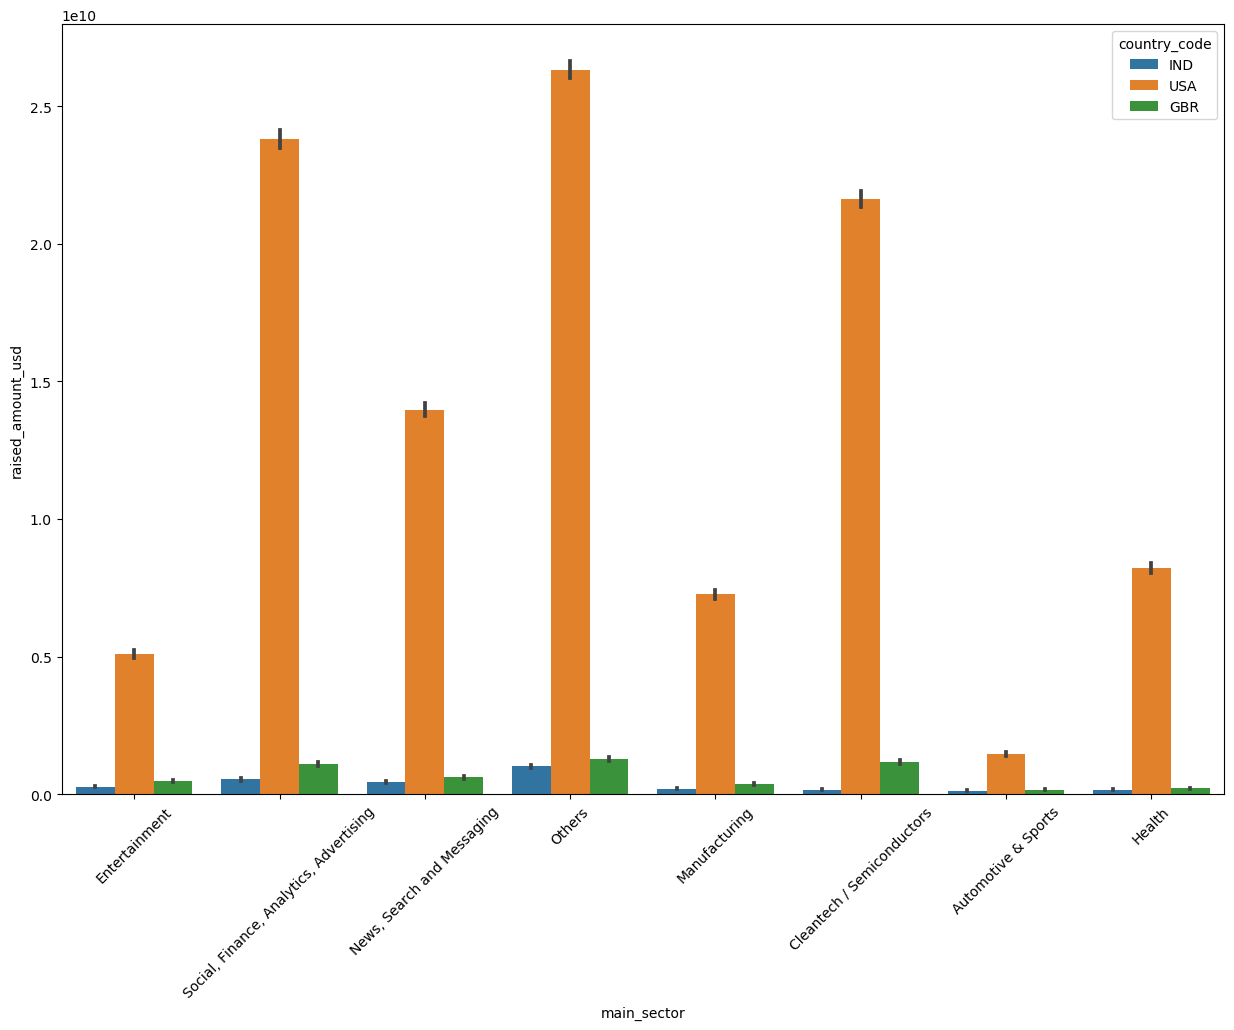

In [1169]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT. 
#This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

plt.figure(figsize=(15, 10))
chart =  sns.barplot(x='main_sector', y='raised_amount_usd', hue="country_code", data=top3EnglishSpeaking, estimator=np.sum)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

In [1170]:
d1 = d1[d1['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]

In [1171]:
d2 = d2[d2['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","Cleantech / Semiconductors"])]

In [1172]:
d3 = d3[d3['main_sector'].isin(["Others","Social, Finance, Analytics, Advertising","News, Search and Messaging"])]

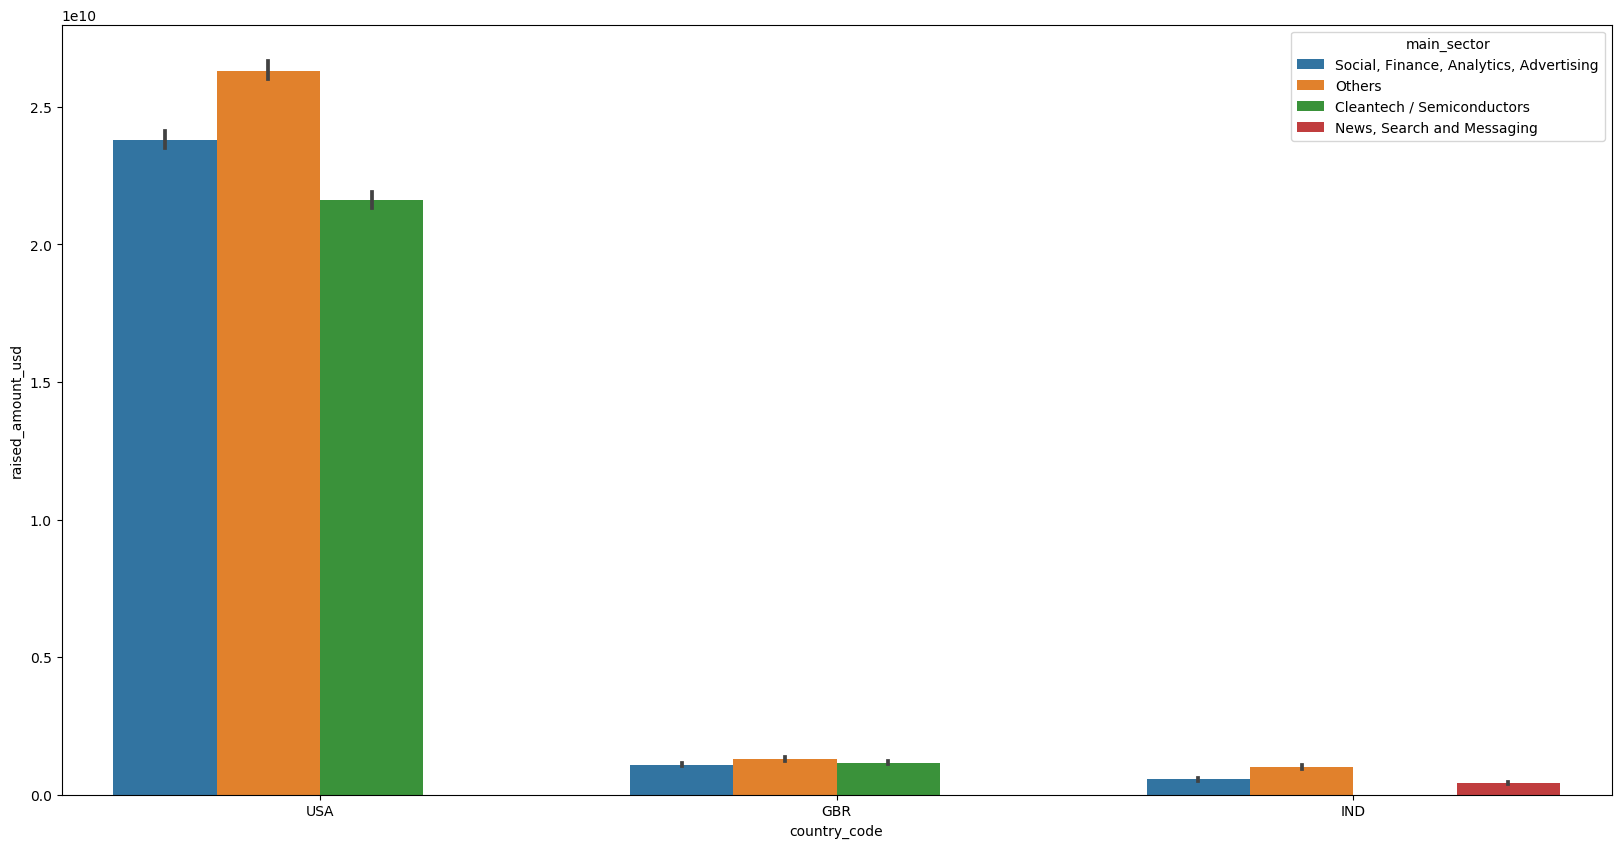

In [1173]:
#A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 

#Checkpoint 6 : 
#A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).
frames = [d1, d2, d3]
result = pd.concat(frames)
plt.figure(figsize=(20, 10))
sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=result, estimator=np.sum)
plt.show()